# PyTorch Training Model

In [ ]:
# Importing Libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

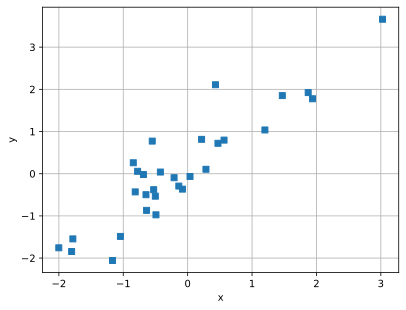

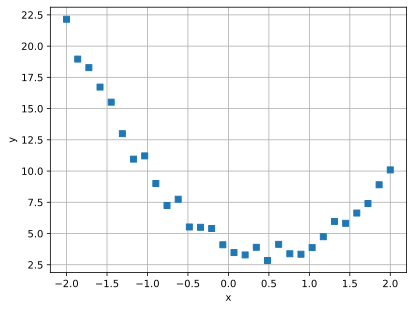

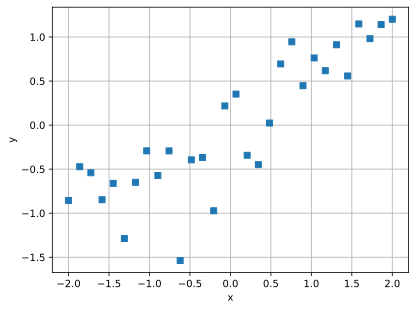

In [ ]:
# Creating the data:
N = 30

# Randomly generated Inputs
x1 = torch.randn(N, 1)
x2 = torch.linspace(-2, 2, N).reshape(-1, 1)
x = [x1,x2,x2]

# Initializing functions
y1 = x1 + torch.randn(N, 1) * 0.5
y2 = 3*x2**2 - 3*x2 + 4 + torch.randn(N, 1) * 0.5
y3 = torch.sin(x2) * torch.exp(-x2**2 * 0.05) + torch.randn(N, 1) * 0.3
y = [y1, y2, y3]

# Descriptive Data:
labels = ['y1 (linear)', 'y2 (parabola)', 'y3 (sin×exp)']

# Plotting the data
for i in range(3):
  plt.plot(x[i], y[i], 's')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid()
  plt.show()

In [ ]:
# Building the Model
ANNreg = nn.Sequential(
    nn.Linear(1, 8),     # Input layer (1 input, 1 output)
    nn.ReLU(),           # Activation Function
    nn.Linear(8, 1)      # Output Layer (1 input, 1 output)
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
# Re-initialize weights
def reset_parameters(model):
    for m in model.modules():
        if hasattr(m, 'reset_parameters'):
            m.reset_parameters()

In [ ]:
# Learning Rate
learningRate = 0.05

# Loss Function
lossFunction = nn.MSELoss()       # Mean Squared Error

# Optimizer (Implementing Gradient Descent)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)

In [ ]:
# Training the Model
numepochs = 100

losses = torch.zeros(3,numepochs)
y_hat = [None]*3

for i in range(3):

  ## Re-initialize weights before each task \
  ## so each dataset is trained from a fresh init.
  reset_parameters(ANNreg)

  ## Training the Model
  for epochi in range(numepochs):
      # Predict
      preds = ANNreg(x[i])

      # Compute loss
      loss = lossFunction(preds, y[i])
      losses[i,epochi] = loss.item()

      # Backward
      optimizer.zero_grad()         # Re-initialize the gradient
      loss.backward()               # Implementing Back Propagation
      optimizer.step()

  y_hat[i] = ANNreg(x[i]).detach()

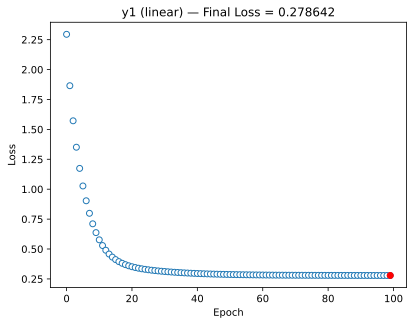

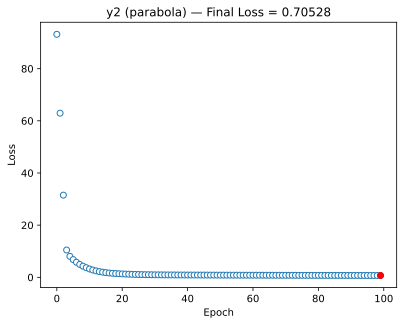

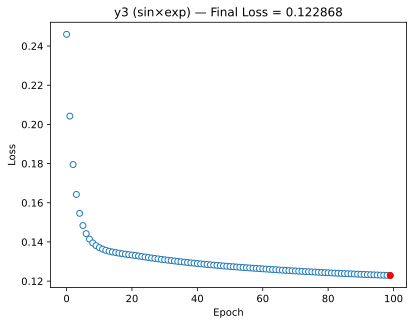

In [ ]:
# Show the Losses
for i in range(3):
  plt.plot(losses[i,:].detach(),'o', markerfacecolor = 'w', linewidth=.1)
  plt.plot(numepochs-1, losses[i,-1].detach(),'ro')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title(f'{labels[i]} — Final Loss = %g' %losses[i,-1].item())
  plt.show()

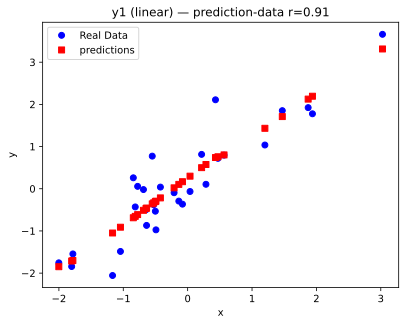

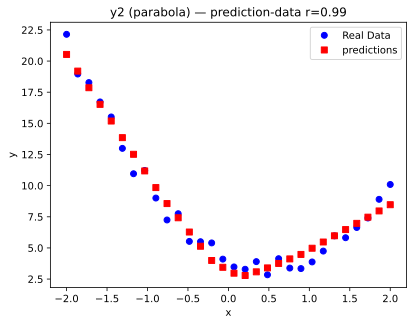

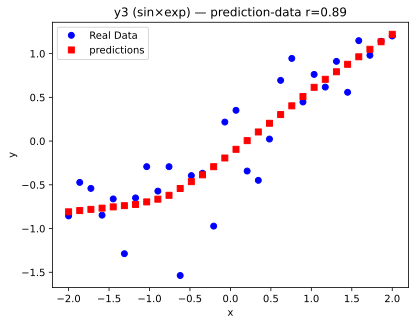

In [ ]:
for i in range(3):
  # Plotting the data
  plt.plot(x[i], y[i], 'bo', label = 'Real Data')
  plt.plot(x[i], y_hat[i].detach(), 'rs', label = 'predictions')
  plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'{labels[i]} — prediction-data r={np.corrcoef(y[i].T, y_hat[i].detach().T)[0,1]:.2f}')
  plt.show()